Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

If you are using Google Colab then you need to ensure that you are using Python 2:

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top or create a new notebook in Python2 by appending "&runtime=python2" to the URL.

In [1]:
#Colab only
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2021-02-23 16:11:46--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.18.236, 2001:1458:201:ee::100:6
Connecting to root.cern.ch (root.cern.ch)|137.138.18.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’

root_v6.13.08.Linux 100%[===================>] 131.05M  17.7MB/s    in 8.4s    

2021-02-23 16:11:56 (15.6 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.1’ saved [137415272/137415272]



In [2]:
#Colab only:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes


ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libPyROOT.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

import ROOT

Welcome to JupyROOT 6.13/08


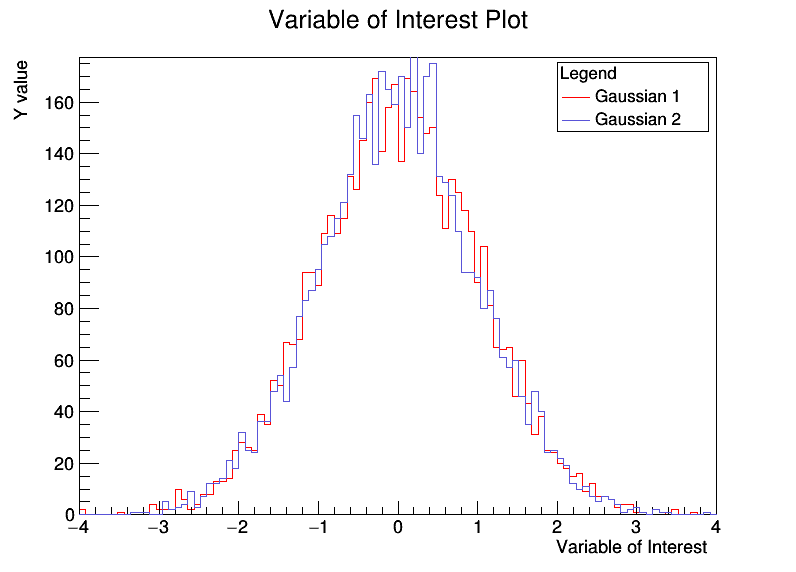

In [3]:
ROOT.gStyle.SetOptStat(0)

h = ROOT.TH1F("gauss1","Example histogram",100,-4,4)
h.FillRandom("gaus")

h2 = ROOT.TH1F("gauss2","Example histogram",100,-4,4)
h2.FillRandom("gaus")

varname = "Variable of Interest"
h.SetTitle(varname + " Plot")
h.GetXaxis().SetTitle(varname)
h.GetYaxis().SetTitle("Y value")
h.SetLineColor(2) # red
h.SetLineWidth(1)
h2.SetTitle(varname)
h2.SetLineColor(9) # blue
h2.SetLineWidth(1)

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

h.Draw()
h2.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h, "Gaussian 1", "l")
leg.AddEntry(h2, "Gaussian 2", "l")
leg.Draw("same")

c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://maastrichtuniversity.instructure.com/courses/5826/files/553829?module_item_id=115201

Then upload it either directly or to your Google Drive and then mount this to your Colab environment

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_path = "/content/drive/MyDrive/MSP/UniData/Big_Data_Physics/B2HHH_MagnetUp.root"


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PX) TTree Float_t branch H1_PX will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PY) TTree Float_t branch H1_PY will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PZ) TTree Float_t branch H1_PZ will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3305139 out of range events


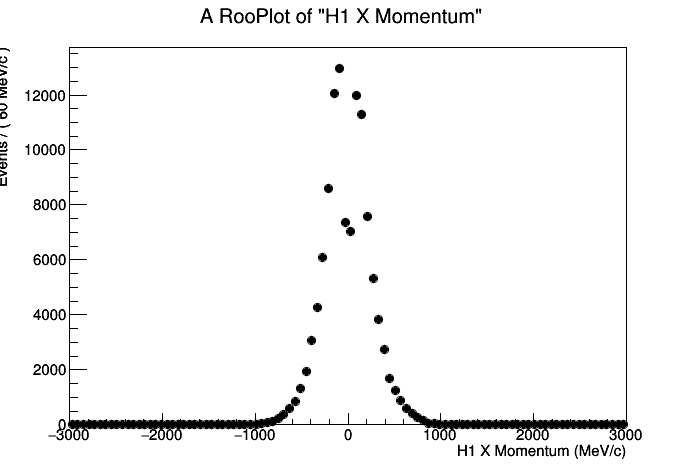

In [6]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open(data_path, "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("data")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

In [7]:
data.get(1).getRealValue("H1_PY")

-199.95687866210938

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [8]:
f.ls()

TFile**		/content/drive/MyDrive/MSP/UniData/Big_Data_Physics/B2HHH_MagnetUp.root	
 TFile*		/content/drive/MyDrive/MSP/UniData/Big_Data_Physics/B2HHH_MagnetUp.root	
  OBJ: TTree	data	LHCB data : 0 at: 0x56099366a100
  OBJ: RooPlot	frame_H1_PX_56099794dba0	A RooPlot of "H1 X Momentum" : 0 at: 0x56099794dba0
  KEY: TTree	data;14	LHCB data
  KEY: TTree	data;13	LHCB data


In [9]:
tree.Show()

======> EVENT:3420194
 B_FlightDistance = 8.43893
 B_VertexChi2    = 7.84392
 H1_PX           = 816.635
 H1_PY           = 368.774
 H1_PZ           = 14055.8
 H1_ProbK        = 0.00679082
 H1_ProbPi       = 0.868581
 H1_Charge       = -1
 H1_IPChi2       = 910.454
 H1_isMuon       = 0
 H2_PX           = -587.363
 H2_PY           = -159.705
 H2_PZ           = 41307.4
 H2_ProbK        = 0.0221071
 H2_ProbPi       = 0.713949
 H2_Charge       = 1
 H2_IPChi2       = 1.76096
 H2_isMuon       = 0
 H3_PX           = -3647.65
 H3_PY           = -960.227
 H3_PZ           = 43878.3
 H3_ProbK        = 0.0291707
 H3_ProbPi       = 0.881665
 H3_Charge       = 1
 H3_IPChi2       = 589.565
 H3_isMuon       = 0
 H1_Ptot         = 14084.3
 H1_type         = 1
 H1_E            = 14085
 H2_Ptot         = 41311.9
 H2_type         = 1
 H2_E            = 41312.1
 H3_Ptot         = 44040.1
 H3_type         = 1
 H3_E            = 44040.3
 M_Ptot          = 99303.1
 M_E             = 99437.4
 M_m0            = 

[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_Ptot) TTree Float_t branch H1_Ptot will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 12283 out of range events


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


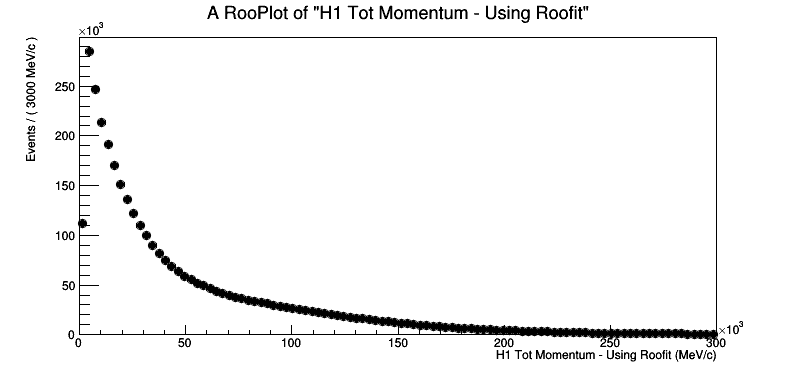

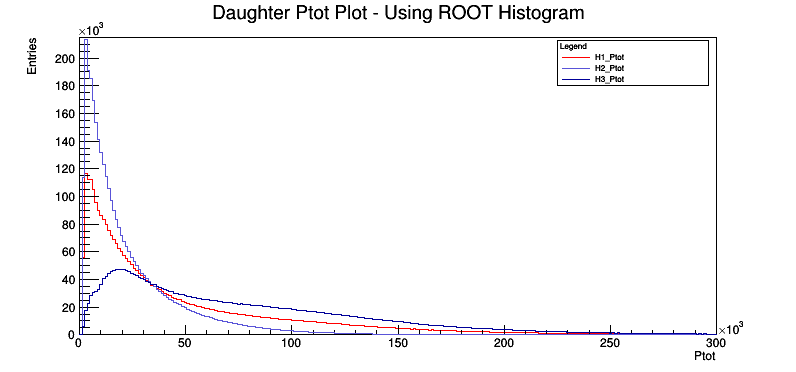

In [90]:
############################ EXAMPLE USING ROOFIT ##########################
tot_mom = ROOT.RooRealVar("H1_Ptot","H1 Tot Momentum - Using Roofit",0,300000,"MeV/c")

data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(tot_mom), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c1 = ROOT.TCanvas("c1","c1", 800, 400)
frame = tot_mom.frame()
data.plotOn(frame)
frame.Draw()
c1.Draw()

############ USING NORMAL ROOT HISTOGRAM #################
#Here make a plot of the Total momentum of each of the three daughters
ROOT.gStyle.SetOptStat(0)

c = ROOT.TCanvas("c", "c", 800, 400)

tree.Draw("H1_Ptot>>h1(250, 0, 300000)")
h1 = ROOT.gDirectory.Get("h1")

tree.Draw("H2_Ptot>>h2(250, 0, 300000)")
h2 = ROOT.gDirectory.Get("h2")

tree.Draw("H3_Ptot>>h3(250, 0, 300000)")
h3 = ROOT.gDirectory.Get("h3")

max = 0
for h in [h1,h2,h3]:
  if h.GetMaximum() >= max:
    max = h.GetMaximum()

varname = "Ptot"

h1.SetMaximum(max + 1500)
h1.SetTitle("Daughter " + varname + " Plot - Using ROOT Histogram")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h2.SetTitle(varname)
h2.SetLineColor(9) # blue
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("SAME")
h3.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")
leg.AddEntry(h2, "H2_Ptot", "l")
leg.AddEntry(h3, "H3_Ptot", "l")

leg.Draw("same")

c.Draw()

Now plot the total momentum for the mother (M_Ptot)

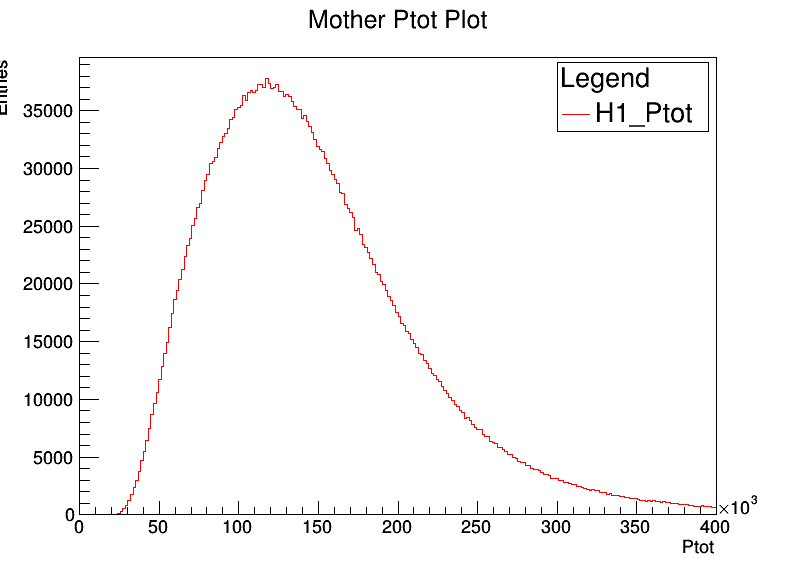

In [12]:
#use the histogram plotting tools, plot the momentum of the mother
c = ROOT.TCanvas("c2", "Ptot 1", 800, 600)

tree.Draw("M_Ptot>>h1(250, 0, 400000)")
h1 = ROOT.gDirectory.Get("h1")

varname = "Ptot"

h1.SetTitle("Mother " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h1.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")

leg.Draw("same")

c.Draw()

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


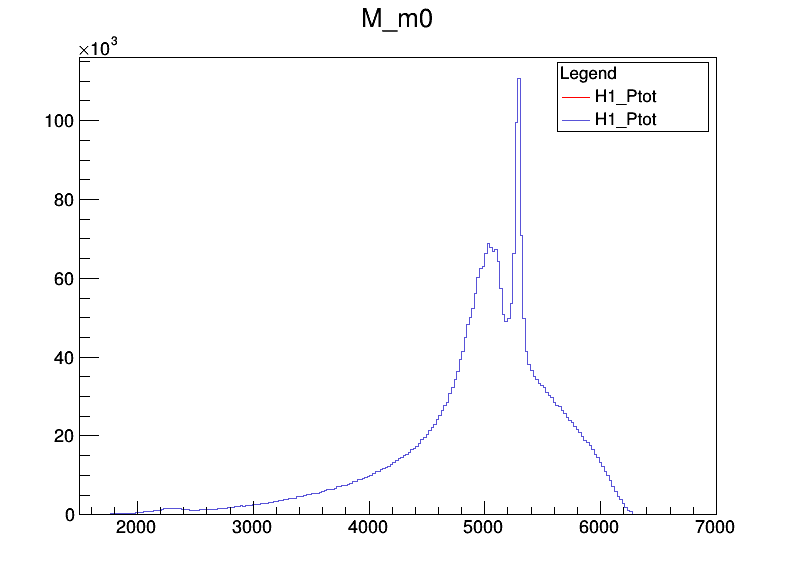

In [14]:
#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

ROOT.gStyle.SetOptStat(0)

c = ROOT.TCanvas("c2", "Ptot 1", 800, 600)

tree.Draw("sqrt(M_E*M_E - M_Ptot*M_Ptot*1**2)/1**2>>H(250, 1500, 7000)")
H = ROOT.gDirectory.Get("H")

tree.Draw("M_m0>>h1(250, 1500, 7000)")
h1 = ROOT.gDirectory.Get("h1")

varname = "Ptot"

H.SetTitle("Daughter " + varname + " Plot")
H.GetXaxis().SetTitle(varname)
H.GetYaxis().SetTitle("Entries")
H.SetLineColor(2) # red
H.SetLineWidth(1)
H.Draw()

h1.SetLineColor(9) # red
h1.SetLineWidth(1)
h1.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(H, "H1_Ptot", "l")
leg.AddEntry(h1, "H1_Ptot", "l")


leg.Draw("same")

c.Draw()

#We can see that the pre stored mass distribution is exactly the same as the calculated one

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

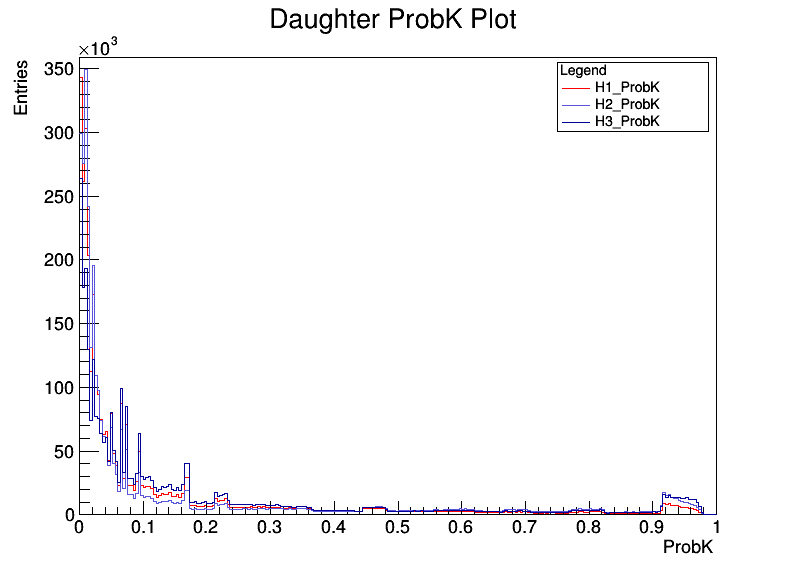

In [15]:
#Make plots of H1/H2/H3 _ProbK on one plot
ROOT.gStyle.SetOptStat(0)

xval = 1
varname = "ProbK"

c = ROOT.TCanvas("c", "c", 800, 600)

tree.Draw("H1_{0}>>h1(250, 0, {1})".format(varname, xval))
h1 = ROOT.gDirectory.Get("h1")

tree.Draw("H2_{0}>>h2(250, 0, {1})".format(varname, xval))
h2 = ROOT.gDirectory.Get("h2")

tree.Draw("H3_{0}>>h3(250, 0, {1})".format(varname, xval))
h3 = ROOT.gDirectory.Get("h3")

max = 0
for h in [h1,h2,h3]:
  if h.GetMaximum() >= max:
    max = h.GetMaximum()

h1.SetMaximum(max + 10000)
h1.SetTitle("Daughter " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h2.SetTitle(varname)
h2.SetLineColor(9) # blue
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("SAME")
h3.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_{}".format(varname), "l")
leg.AddEntry(h2, "H2_{}".format(varname), "l")
leg.AddEntry(h3, "H3_{}".format(varname), "l")

leg.Draw("same")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


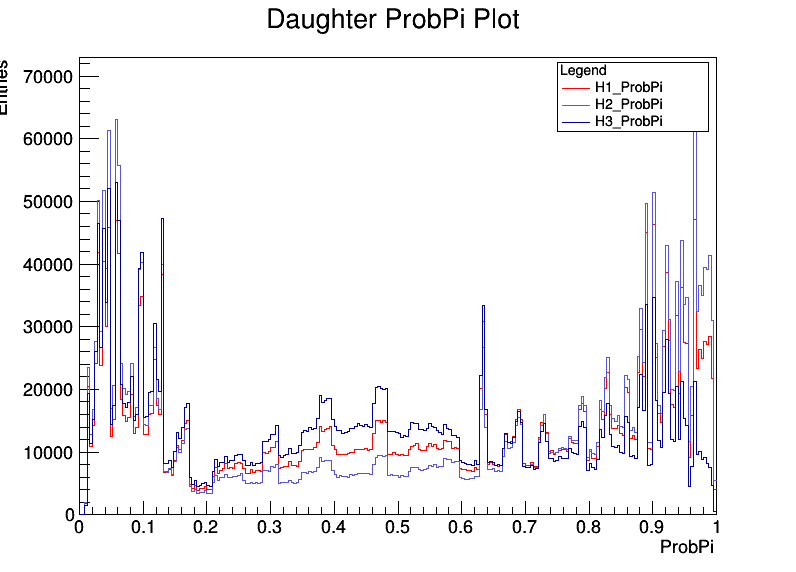

In [16]:
#Make plots of H1/H2/H3 _ProbPi on one plot
xval = 1
varname = "ProbPi"

c = ROOT.TCanvas("c", "c", 800, 600)

tree.Draw("H1_{0}>>h1(250, 0, {1})".format(varname, xval))
h1 = ROOT.gDirectory.Get("h1")

tree.Draw("H2_{0}>>h2(250, 0, {1})".format(varname, xval))
h2 = ROOT.gDirectory.Get("h2")

tree.Draw("H3_{0}>>h3(250, 0, {1})".format(varname, xval))
h3 = ROOT.gDirectory.Get("h3")

max = 0
for h in [h1,h2,h3]:
  if h.GetMaximum() >= max:
    max = h.GetMaximum()

h1.SetMaximum(max + 10000)
h1.SetTitle("Daughter " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h2.SetTitle(varname)
h2.SetLineColor(9) # blue
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("SAME")
h3.Draw("SAME")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_{}".format(varname), "l")
leg.AddEntry(h2, "H2_{}".format(varname), "l")
leg.AddEntry(h3, "H3_{}".format(varname), "l")

leg.Draw("same")

c.Draw()

Using these plots, we can now make a preselection string. This is a text string that looks like 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


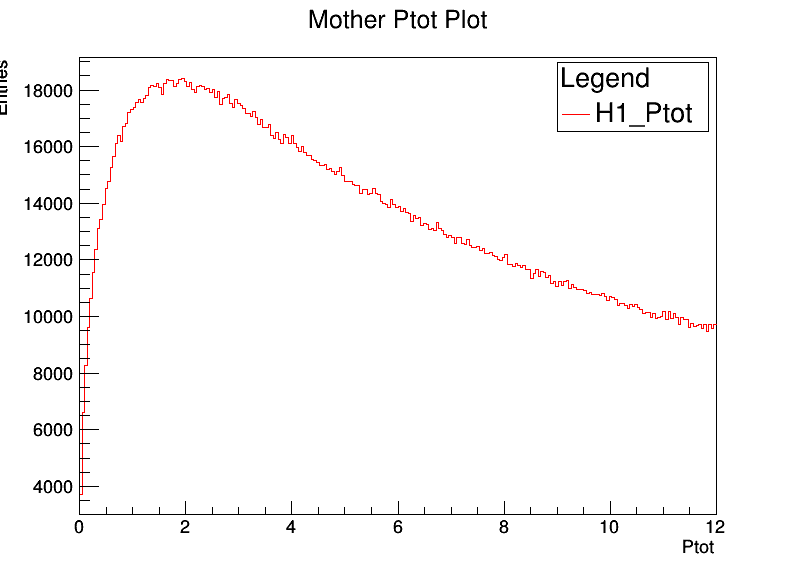

In [17]:
#For all our particles, make a plot of the B_VertexChi2
c = ROOT.TCanvas("c", "c", 800, 600)

xmax = tree.GetMaximum("B_VertexChi2")

tree.Draw("B_VertexChi2>>h1(250, 0, {})".format(xmax))
h1 = ROOT.gDirectory.Get("h1")

varname = "Ptot"

h1.SetTitle("Mother " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h1.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")
leg.Draw("same")

c.Draw()

In [18]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
selection=("H1_ProbPi>0.9 && H2_ProbPi>0.9 && H3_ProbPi>0.9 && H1_isMuon >0.9")

In [19]:
#To apply the selection - we can use the copytree command:
selection=("H1_ProbK>0.3 && H2_ProbK>0.3 && H3_ProbK>0.3 && H1_ProbK>H1_ProbPi && H2_ProbK>H2_ProbPi && H3_ProbK>H3_ProbPi && !H1_isMuon && !H2_isMuon && !H2_isMuon")
CutTree=tree.CopyTree(selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


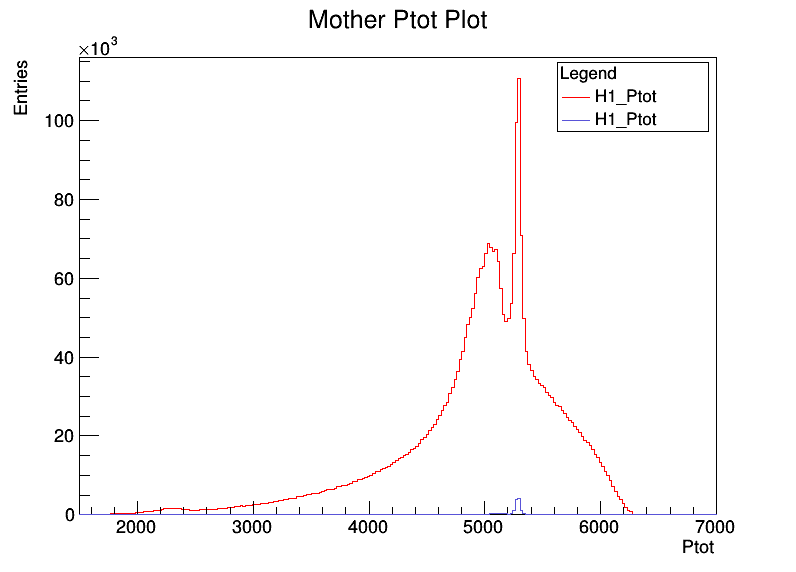

In [20]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

c = ROOT.TCanvas("c", "c", 800, 600)


tree.Draw("M_m0>>h1(250, 1500, 7000)")
h1 = ROOT.gDirectory.Get("h1")

CutTree.Draw("M_m0>>h2(250, 1500, 7000)")
h2 = ROOT.gDirectory.Get("h2")

varname = "Ptot"

h1.SetTitle("Mother " + varname + " Plot")
h1.GetXaxis().SetTitle(varname)
h1.GetYaxis().SetTitle("Entries")
h1.SetLineColor(2) # red
h1.SetLineWidth(1)

h2.SetLineColor(9) # red
h2.SetLineWidth(1)

h1.Draw()
h2.Draw("same")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h1, "H1_Ptot", "l")
leg.AddEntry(h2, "H1_Ptot", "l")

leg.Draw("same")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


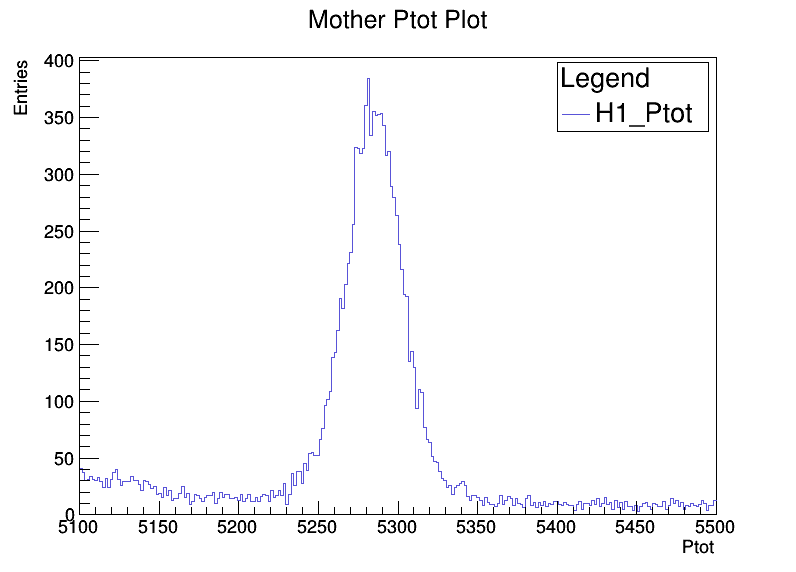

In [21]:
c = ROOT.TCanvas("c", "c", 800, 600)

CutTree.Draw("M_m0>>h2(250, 5100, 5500)")
h2 = ROOT.gDirectory.Get("h2")

varname = "Ptot"

h2.SetTitle("Mother " + varname + " Plot")
h2.GetXaxis().SetTitle(varname)
h2.GetYaxis().SetTitle("Entries")
h2.SetLineColor(9) # red
h2.SetLineWidth(1)

h2.Draw()

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h2, "H1_Ptot", "l")

leg.Draw("same")

c.Draw()

# Assymetry Analysis

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

## Estimations with Gaussian fit shape



### Mass fitting

In [70]:
#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("M_m0","Mass",5150,5400,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",5000,5150,5400)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)
#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

In [71]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 5685 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **   82 **SET PRINT           1
 **********
 **********
 **   83 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   1.14006e+05  5.70030e+04    0.00000e+00  1.02606e+07
 MINUIT WARNING IN PARAM DEF
 ============== LIMITS ON PARAM1 TOO FAR APART.
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     2 Mean         5.15000e+03  2.50000e+01    5.15000e+03  5.40000e+03
 MINUIT WARNIN

[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Bkgnd)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


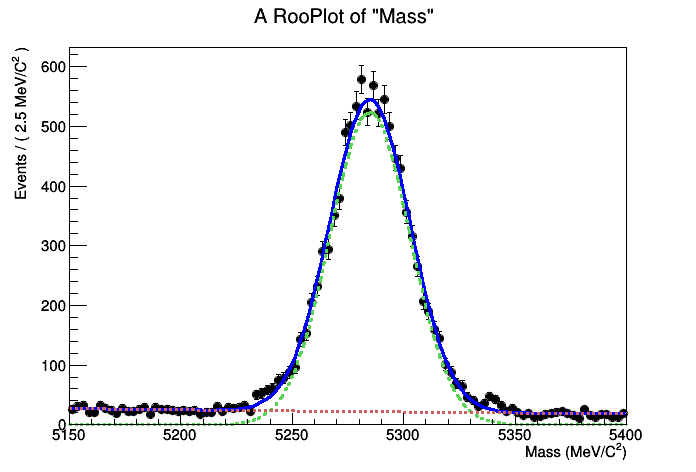

In [72]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
frame.Draw()
c1.Update()
c1.Draw()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [73]:
full_signal_yield = Gauss_Norm.getValV()
full_signal_error = Gauss_Norm.getError()
full_chi2ndf = frame.chiSquare()

print(full_signal_yield, full_signal_error, full_chi2ndf)

(9444.482398919678, 106.85630203447727, 91.93706997259935)


### Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

In [74]:
Bplus_cuts = ("H1_Charge+H2_Charge+H3_Charge == 1")
Bminus_cuts = ("H1_Charge+H2_Charge+H3_Charge == -1")

bplusTree = CutTree.CopyTree(Bplus_cuts)
bminusTree = CutTree.CopyTree(Bminus_cuts)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


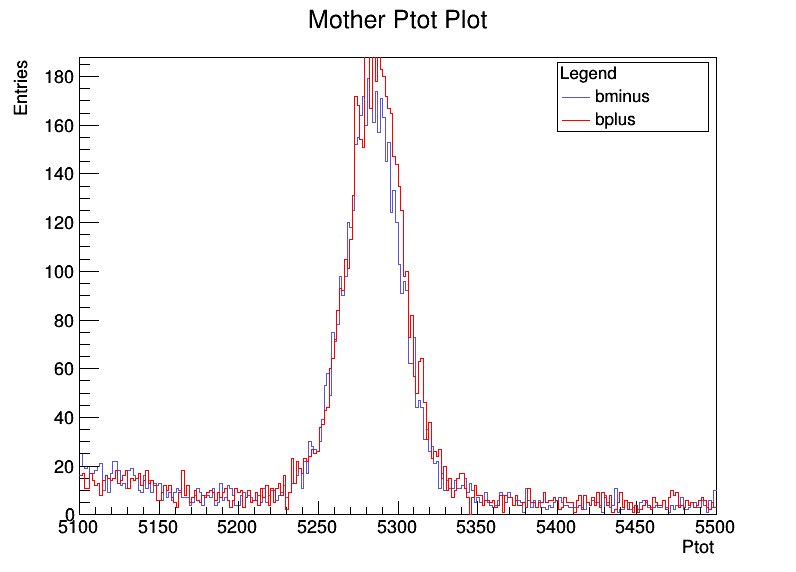

In [75]:
c = ROOT.TCanvas("c", "c", 800, 600)

bplusTree.Draw("M_m0>>h1(250, 5100, 5500)")
h1 = ROOT.gDirectory.Get("h1")

bminusTree.Draw("M_m0>>h2(250, 5100, 5500)")
h2 = ROOT.gDirectory.Get("h2")

varname = "Ptot"

h2.SetTitle("Mother " + varname + " Plot")
h2.GetXaxis().SetTitle(varname)
h2.GetYaxis().SetTitle("Entries")
h2.SetLineColor(9) # red
h2.SetLineWidth(1)

h1.SetLineColor(2) # red
h1.SetLineWidth(1)


h2.Draw()
h1.Draw("same")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h2, "bminus", "l")
leg.AddEntry(h1, "bplus", "l")

leg.Draw("same")

c.Draw()

#### B Plus calculations

In [76]:
mass = ROOT.RooRealVar("M_m0","Mass",5150,5400,"MeV/C^{2}")

gaussMean = ROOT.RooRealVar("Mean","Mean",5000,5150,5400)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", bplusTree, ROOT.RooArgSet(mass))

model.fitTo(data_to_fit)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 2846 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **   91 **SET PRINT           1
 **********
 **********
 **   92 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   1.14006e+05  5.70030e+04    0.00000e+00  1.02606e+07
 MINUIT WARNING IN PARAM DEF
 ============== LIMITS ON PARAM1 TOO FAR APART.
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     2 Mean         5.15000e+03  2.50000e+01    5.15000e+03  5.40000e+03
 MINUIT WARNIN

[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Bkgnd)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


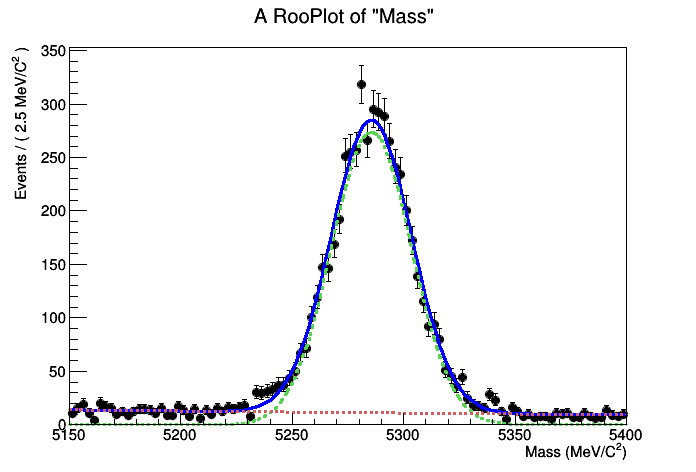

In [77]:
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
frame.Draw()
c1.Update()
c1.Draw()

In [78]:
Bplus_signal_yield = Gauss_Norm.getValV()
Bplus_signal_error = Gauss_Norm.getError()
Bplus_chi2ndf = frame.chiSquare()

print(Bplus_signal_yield, Bplus_signal_error, Bplus_chi2ndf)

(4936.863765310058, 77.27021313019668, 48.87435285189418)


#### B minus calculations

In [79]:
mass = ROOT.RooRealVar("M_m0","Mass",5150,5400,"MeV/C^{2}")

gaussMean = ROOT.RooRealVar("Mean","Mean",5000,5150,5400)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 3)

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/30, 0, tree.GetEntries() * 2)

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", bminusTree, ROOT.RooArgSet(mass))

model.fitTo(data_to_fit)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 2839 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **  100 **SET PRINT           1
 **********
 **********
 **  101 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   1.14006e+05  5.70030e+04    0.00000e+00  1.02606e+07
 MINUIT WARNING IN PARAM DEF
 ============== LIMITS ON PARAM1 TOO FAR APART.
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     2 Mean         5.15000e+03  2.50000e+01    5.15000e+03  5.40000e+03
 MINUIT WARNIN

[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (Bkgnd)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


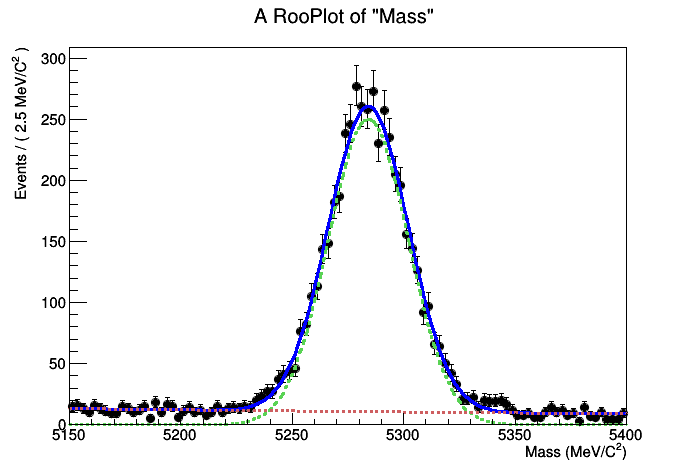

In [80]:
c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
frame.Draw()
c1.Update()
c1.Draw()

In [81]:
Bminus_signal_yield = Gauss_Norm.getValV()
Bminus_signal_error = Gauss_Norm.getError()
Bminus_chi2ndf = frame.chiSquare()

print(Bminus_signal_yield, Bminus_signal_error, Bminus_chi2ndf)

(4504.262982459212, 73.79660296845077, 44.53104560931307)


Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [83]:
#Here do your calculation of the final result
import math
Assym = (Bminus_signal_yield - Bplus_signal_yield)/(Bminus_signal_yield + Bplus_signal_yield)
Assym_err = math.sqrt((1-Assym**2)/(Bminus_signal_yield + Bplus_signal_yield))

print("A = " + str(Assym) + " +- " + str(Assym_err))

A = -0.0458208849863 +- 0.0102809132457


# Estimation with GaussCB

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [28]:
#Define a function to find the invarient mass of two given Kaons

In [29]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter 

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [30]:
#Make the revised Dalitz plot here for B+ mesons

In [31]:
#Make the revised Dalitz plot here for B- mesons

In [32]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)